In [2]:
from astropy.table import Table
import pandas as pd
import numpy as np
import os
import tqdm
import astropy.units as u
import multiprocessing as mp

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)

# import lightkurve as lk
# import cesium
# from cesium import time_series
# from cesium import featurize

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [6]:
tess = pd.read_csv("/home/jbirky/Dropbox/research/catalogs/literature/tess_eb_catalog_villanova_sept30.csv")

per = np.array([x.strip(" ") for x in list(tess['period'])])
per[per == ''] = np.nan
tess['period'] = np.array(per, dtype=float)
tess['TIC'] = tess['tic__tess_id']
tess['morph'] = tess['morph_coeff']
tess['RA'] = tess['tic__ra']
tess['DEC'] = tess['tic__dec']
tess = tess[['TIC', 'period', 'morph', 'RA', 'DEC']]
tess = tess[tess['period'] < 10]

tess

,TIC,period,morph,RA,DEC
1,107548305,0.048979,0.949,212.817308,-30.884359
2,467187065,0.064162,0.499,296.178558,54.828580
3,369586828,0.082014,0.629,2.517347,-46.015651
4,611402948,0.093370,0.472,18.412876,22.960853
5,99641129,0.095646,0.543,107.675213,66.928756
...,...,...,...,...,...
4065,28224552,9.926588,0.123,28.083357,25.455465
4066,252554485,9.942987,0.610,345.099656,48.302684
4067,11491822,9.946591,0.207,96.607650,56.285099
4068,380783252,9.965309,0.716,269.714465,-60.921834


In [16]:
tess.keys()

Index(['tic__tess_id', 'tic__ra', 'tic__dec', 'tic__Tmag', 'bjd0', 'period',
       'morph_coeff', 'Unnamed: 7'],
      dtype='object')

In [3]:
def download_lc(tic):
    dl_ids = [x.strip('TIC').strip('.npz') for x in os.listdir("tess_lc")]
    if str(tic) not in dl_ids:
        try:
            lc = lk.search_lightcurve("TIC "+str(tic), mission="TESS", author='SPOC').download_all().stitch().normalize()
            np.savez("tess_lc/TIC"+str(tic), time=lc.time.value, flux=lc.flux.value, flux_err=lc.flux_err.value)
        except:
            print(tic)
            
def load_lc(tic):
    loaded = np.load(f"tess_lc/TIC{str(tic)}.npz")
    lc = lk.LightCurve(time=loaded['time'], flux=loaded['flux'], flux_err=loaded['flux_err']).remove_nans()
    return lc

In [4]:
pool = mp.Pool(20)
pool.map(download_lc, list(tess['TIC']))

# idlist = list(tess['tic__tess_id'])
              
# with mp.Pool(20) as p:
#     for result in tqdm.tqdm(p.imap(func=download_lc, iterable=idlist), total=len(idlist)):
#         pass

364186197


356630364


271893367


198280388


219107776


364965655


392536812


353565609


219109908
102929927


7724421


198354443


373915220
160425283


260502102


233079659


260162199


31415131


240122720


320323992


281728276


185466937


4164713


25155310
92938280
92938279


158565141


1981621672


350743714
198242676
48191564
178858648
405685992
306107122
320524751
389669796
158301961
198537349
319936228
407067592


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [12]:
dl_ids = [int(x.strip('TIC').strip('.npz')) for x in os.listdir("tess_lc")]
tess[tess['TIC'].isin(dl_ids)].to_csv("tess_eb_selected.csv")

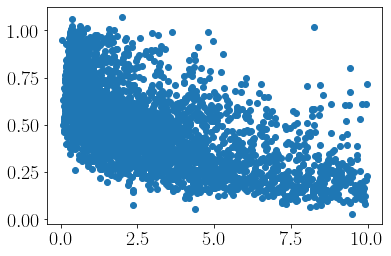

In [5]:
plt.scatter(tess['period'], tess['morph'])
plt.show()